In [3]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import scipy.optimize
from scipy.stats import chi2, kstwobign, norm
from mpmath import mp
from scipy.stats import f
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# $$\xi_1 \text{\textasciitilde} (a_1, \varphi_1^2),\ \eta_1 \text{\textasciitilde} (b_1, \psi_1^2)$$
# $$\xi_2 \text{\textasciitilde} (a_2, \varphi_2^2),\ \eta_2 \text{\textasciitilde} (b_2, \psi_2^2)$$
# $$H_0: \varphi_1^2 = \psi_1^2,\ \varphi_2^2 = \psi_2^2,\ \ H_1: \varphi_1^2 \neq \psi_1^2 \lor \varphi_2^2 \neq \psi_2^2$$

# $\alpha = 0.05$

### Если $H_0$ верна, то $\frac{S_{x_1}^2}{S_{y_1}^2} \text{\textasciitilde} F(n - 1, m - 1)\ \land\ \frac{S_{x_2}^2}{S_{y_2}^2} \text{\textasciitilde} F(n - 1, m - 1)$

In [ ]:
sigma1_length, sigma2_length = 5.722, 6.161
sigma1_width, sigma2_width = 4.612, 5.055
n1, n2 = 139, 1000

F_length = (sigma1_length ** 2) / (sigma2_length ** 2)
F_width = (sigma1_width ** 2) / (sigma2_width ** 2)

alpha = 0.05
df1, df2 = n1 - 1, n2 - 1
F_crit_lower = f.ppf(alpha / 2, df1, df2)
F_crit_upper = f.ppf(1 - alpha / 2, df1, df2)

print(f"F-статистика (длина): {F_length:.3f}")
print(f"F-статистика (ширина): {F_width:.3f}")
print(f"Критические значения F: [{F_crit_lower:.3f}, {F_crit_upper:.3f}]")

F-статистика (длина): 0.863
F-статистика (ширина): 0.832
Критические значения F: [0.767, 1.272]


In [ ]:
p_value_length = f.sf(F_length, df1, df2)
p_value_width = f.sf(F_width, df1, df2)
# print(p_value_length, p_value_width)
print(f"p_value_length = {p_value_length}")
print(f"p_value_width = {p_value_width}")

0.8635945115489605 0.9134225454551342


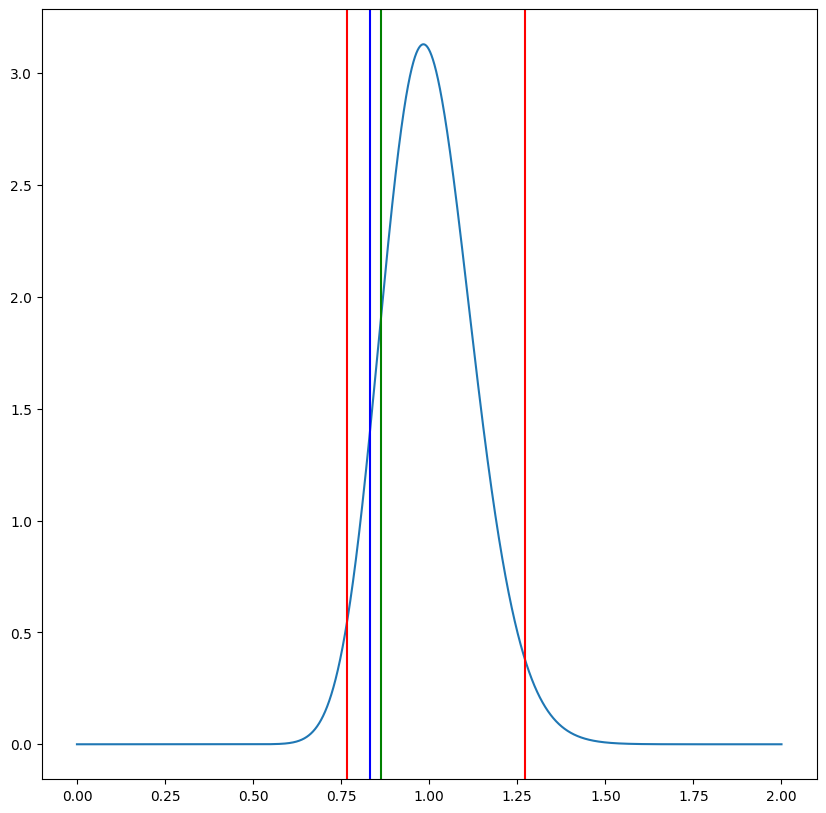

In [23]:
__x = np.linspace(0, 2, 10000)
__y = f.pdf(__x, df1, df2)

plt.figure(figsize=(10, 10))
plt.plot(__x, __y)
plt.axvline(x=F_crit_lower, color="red")
plt.axvline(x=F_crit_upper, color="red")
plt.axvline(x=F_length, color="green")
plt.axvline(x=F_width, color="blue")

## $$F_{0.025} \le F_{length} \le F_{0.975}\ \ \ \ \land\ \ \ \ F_{0.025} \le F_{width} \le F_{0.975}$$
## $$ \Longrightarrow нет\ оснований\ отвергнуть\ H_0$$